# Algorithm #

In [1]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import math
#import operator
import cv2

## Load Image ##

In [2]:
def loadImage(path, name):
    image = cv2.imread('{path}/{name}'.format(path=path,name=name))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = 255 - image
    return numpy.asarray(image)

def thinnImage(image):
    image = cv2.ximgproc.thinning(image)
    return image

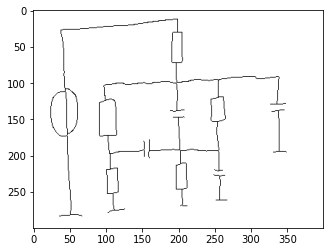

In [3]:
image = loadImage("./../src/testImages","raf1.png")
image = cv2.resize(image, (400,300), interpolation = cv2.INTER_AREA)

#for y in range(0,len(image)):
#    for x in range(0, len(image[y])):
#        if image[y][x] > 1:
#            image[y][x] = 255
#        else:
#            image[y][x] = 0

cv2.imwrite("out.png", 255 - image)

image = thinnImage(image)

cv2.imwrite("thinn.png", 255 - image)

plt.imshow(image, cmap=plt.cm.binary)

## Filter ##

Only odd numbers for filter lengths

In [4]:
def getRegion(filter, x, y, image):
    yOffset = math.floor(len(filter)/2)
    xOffset = math.floor(len(filter[0])/2)
    return image[y-yOffset:y+yOffset+1, x-xOffset:x+xOffset+1]

def whiteFilter(image):
    filter = numpy.asarray([[0,0,0],[0,0,0],[0,0,0]])
    image = numpy.asarray(image)
    features = numpy.empty_like(image)
    for y in range(1,len(image)-1):
        for x in range(1,len(image[y])-1):
            if numpy.all(numpy.equal(filter, getRegion(filter, x, y, image))):
                features[y][x] = 255
            else:
                features[y][x] = 0
    return features

def applyFilter(filter, image, points):
    image = numpy.asarray(image)
    features = []
    for (x, y) in points:
        if numpy.all(numpy.equal(filter, getRegion(filter, x, y, image))):
            features.append((x,y))
    return features

In [5]:
whiteFeatures = whiteFilter(image)
points = []
for y in range(1, len(whiteFeatures)-1):
    for x in range(1, len(whiteFeatures[y])-1):
        if whiteFeatures[y][x] == 0:
            points.append((x,y))

In [6]:
def rotateFilters(filters):
    rotatedFilters = []
    for filter in filters:
        for k in range(0,4):
            rotatedFilters.append(numpy.rot90(filter, k))
    return rotatedFilters

In [7]:
filters = []
filters.append([[0,0,0],[0,255,255],[0,0,0]])
filters.append([[255,0,0],[0,255,0],[0,0,0]])

endPointFilters = rotateFilters(filters)
endPoints = []
for filter in endPointFilters:
    endPoints = endPoints + applyFilter(filter, image, points)
#print(endPoints)


filters = []
filters.append([[0,0,0],[255,255,255],[0,255,0]])
filters.append([[0,0,0],[255,0,255],[0,255,0]])
filters.append([[255,0,0],[0,255,255],[0,255,0]])
filters.append([[0,0,255],[255,255,255],[0,255,0]])
filters.append([[255,0,0],[255,255,255],[0,255,0]])
filters.append([[0,255,0],[0,255,255],[255,255,255]])
filters.append([[255,0,255],[0,255,255],[0,255,0]])
filters.append([[255,0,255],[255,255,0],[0,255,0]])

intersectionFilters = rotateFilters(filters)

intersections = []
for filter in intersectionFilters:
    intersections = intersections + applyFilter(filter, image, points)


In [8]:
filteredIntersections = []

filteredIntersections.append(intersections[0])
intersections.remove(intersections[0])

for inter in intersections:
    connected = False
    for filtered in filteredIntersections:
        dist = math.sqrt((inter[0] - filtered[0])**2 + (inter[1] - filtered[1])**2)
        if dist < 2:
            connected = True
    if not connected:
        filteredIntersections.append(inter)

intersections = []
intersections = intersections + filteredIntersections

Mark end points red and intersections green

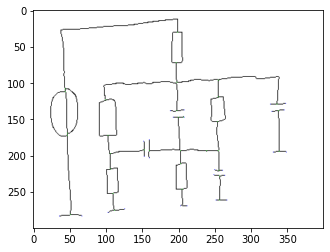

In [9]:
outImage = []
for y in range(0,len(image)):
    row = []
    for x in range(0,len(image[y])):
        if image[y][x] >= 1:
            row.append((0,0,0))
        else:
            row.append((255,255,255))
    outImage.append(row)
    
for point in endPoints:
    outImage[point[1]][point[0]] = (0,0,255)

for point in intersections:
    outImage[point[1]][point[0]] = (0,255,0)

cv2.imwrite("points.png", numpy.asarray(outImage))
    
plt.imshow(outImage, interpolation='bilinear')

In [10]:
list1 = [(72,197), (138,338), (147,200), (153,254), (172,103), (246,205), (108,44), (169,47), (193,160), (30,199), (129,336), (138,198), (194,339), (261,257), (275,112), (92,280), (102,131), (193,239), (147,207), (172,47), (192,153), (99,167), (193,203), (228,257), (94,314), (99,198), (211,203), (281,51), (112,44), (193,255), (252,110), (197,106), (119,255), (218,106), (220,256), (96,255), (123,100)]
print(len(list1))
list2 = []

list2.append(list1[0])
list1.remove(list1[0])

for inter in list1:
    connected = False
    for filtered in list2:
        dist = math.sqrt((inter[0] - filtered[0])**2 + (inter[1] - filtered[1])**2)
        if dist < 5:
            connected = True
    if not connected:
        list2.append(inter)

print(len(list2))

37
35
